In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# PARAMETERS
selected_ticker = 'GAM MK Equity'
selected_factor = 'Net Debt scaled by ME'
horizon_days = 21

# 1) Load computed factors
factors = pd.read_csv('computed_factors.csv')
factors['Date'] = pd.to_datetime(factors['Date']).dt.tz_localize(None)

# 2) Load market prices and compute forward returns
price_files = {
    'CIMB MK Equity': 'Data_Market_CIMB.xlsx',
    'GAM MK Equity':  'Data_Market_GAM.xlsx',
}
price_dfs = []
for ticker, fn in price_files.items():
    p = pd.read_excel(fn, skiprows=1, na_values=['#N/A'])
    p['Date'] = pd.to_datetime(p['Date'], dayfirst=True)
    p = p.dropna(subset=['PX_LAST']).sort_values('Date')
    p['Ticker'] = ticker
    # forward return = (price_t+horizon / price_t) - 1
    p['forward_return'] = p['PX_LAST'].shift(-horizon_days) / p['PX_LAST'] - 1
    price_dfs.append(p[['Ticker','Date','forward_return']])

prices = pd.concat(price_dfs, ignore_index=True)

prices.head()

,Ticker,Date,forward_return
0,CIMB MK Equity,2017-12-13,0.098706
1,CIMB MK Equity,2017-12-14,0.065934
2,CIMB MK Equity,2017-12-15,0.072900
3,CIMB MK Equity,2017-12-18,0.081081
4,CIMB MK Equity,2017-12-19,0.092800


In [5]:
# 3) Filter for the ticker & factor, then merge
df_factor = factors[
    (factors['Ticker'] == selected_ticker) &
    (factors['Name'] == selected_factor)
].copy()

df_plot = (
    df_factor
    .merge(prices[prices['Ticker']==selected_ticker], on=['Ticker','Date'], how='inner')
    .dropna(subset=['forward_return', 'Value'])
)

df_factor.head(100)

,Ticker,Date,Value,Name
86355,GAM MK Equity,2017-12-13,NaN,Net Debt scaled by ME
86356,GAM MK Equity,2017-12-14,NaN,Net Debt scaled by ME
86357,GAM MK Equity,2017-12-15,NaN,Net Debt scaled by ME
86358,GAM MK Equity,2017-12-16,NaN,Net Debt scaled by ME
86359,GAM MK Equity,2017-12-17,NaN,Net Debt scaled by ME
...,...,...,...,...
86450,GAM MK Equity,2018-03-18,NaN,Net Debt scaled by ME
86451,GAM MK Equity,2018-03-19,NaN,Net Debt scaled by ME
86452,GAM MK Equity,2018-03-20,NaN,Net Debt scaled by ME
86453,GAM MK Equity,2018-03-21,NaN,Net Debt scaled by ME


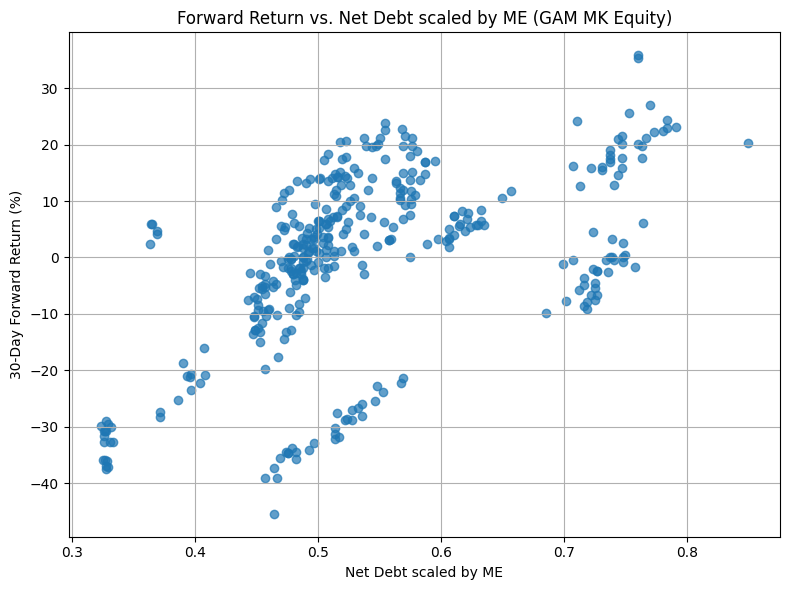

In [ ]:
# scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df_plot['Value'], df_plot['forward_return'] * 100, alpha=0.7)
plt.title(f'Forward Return vs. {selected_factor} ({selected_ticker})')
plt.xlabel(selected_factor)
plt.ylabel(f'{horizon_days}-Day Forward Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
